In [5]:
# import library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# set default directory
os.chdir('/home/lbertel/code/talento_tech/content')

# set style matplotlib
plt.style.use('tableau-colorblind10')

# load data
colombia_df = pd.read_csv('data/processed/colombia_data.csv')
colombia_df.head(10)

,YEAR,MONTH,PRODUCT,VALUE
0,2014,1,Hydro,3903.977
1,2014,1,Wind,5.648
2,2014,1,Solar,1.065
3,2014,1,Coal,521.938
4,2014,1,Oil,139.219
5,2014,1,Natural gas,1031.146
6,2014,1,Combustible renewables,99.721
7,2014,1,Net electricity production,5702.714
8,2014,1,Electricity supplied,5555.847
9,2014,1,Distribution losses,536.164


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


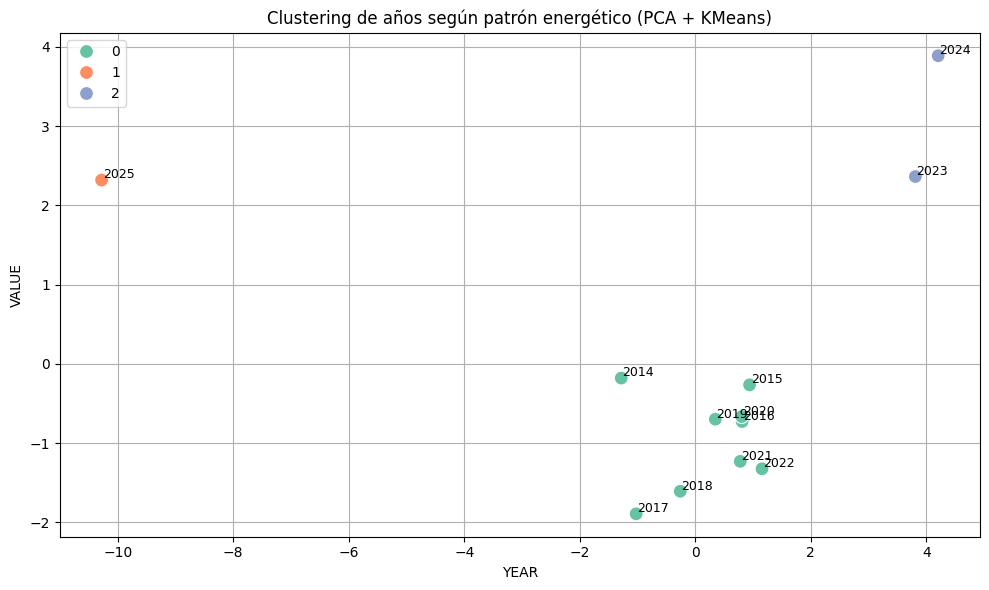

In [10]:
df_pivot = colombia_df.pivot_table(index='YEAR', columns='PRODUCT', values='VALUE', aggfunc='sum').fillna(0)

# 2. data scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_pivot)

# 3. Reducing dimensions with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# 4. Group by with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# 5. show result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='Set2', s=100)

# Añadir etiquetas de años
for i, year in enumerate(df_pivot.index):
    plt.text(pca_result[i, 0]+0.02, pca_result[i, 1]+0.02, str(year), fontsize=9)

plt.title('Clustering de años según patrón energético (PCA + KMeans)')
plt.xlabel('YEAR')
plt.ylabel('VALUE')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("fig_19.eps")